In [1]:
#Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [26]:
#Read data

df= pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Latest Material\Day 13 Linear Regression\Datasets\NewspaperData.csv')

In [31]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [35]:
#Select relevent column

df=df[['daily','sunday']]

In [36]:
df 

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [38]:
#Data Description

df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


<AxesSubplot:xlabel='daily', ylabel='Density'>

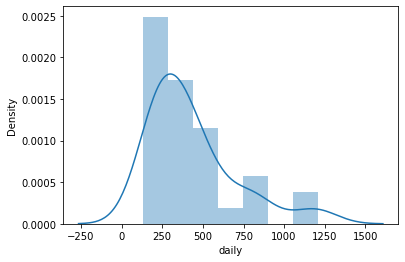

In [40]:
#Data Distribution
sns.distplot(df['daily'])

<AxesSubplot:xlabel='daily', ylabel='Density'>

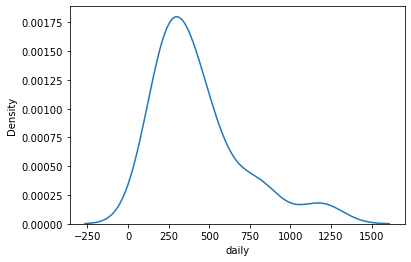

In [41]:
sns.kdeplot(df['daily'])

<AxesSubplot:xlabel='daily', ylabel='sunday'>

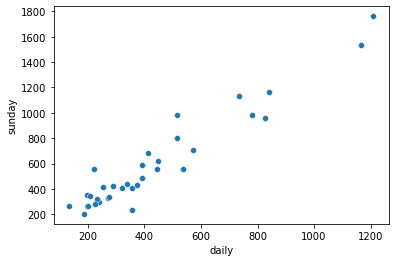

In [43]:
#Correlatin Analysis

sns.scatterplot(df['daily'],df['sunday'])

In [44]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

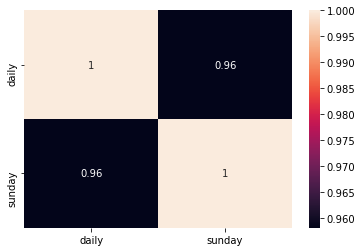

In [46]:
sns.heatmap(df.corr(), annot=True)

In [47]:
#Import statsmodel

import statsmodels.formula.api as smf

In [48]:
model= smf.ols('sunday~daily', data= df).fit()

In [52]:
#Model parameters

model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [54]:
#Line equation

x=500
y=1.33*x+ 13.83
y 

678.83

In [55]:
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [56]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [60]:
#Print values for t value and p value
print(f't value is \n {model.tvalues}\n P value is \n{model.pvalues}')

t value is 
 Intercept     0.386427
daily        18.934840
dtype: float64
 P value is 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [61]:
#R2 value

model.rsquared

0.9180596895873295

In [62]:
model.rsquared_adj

0.9154990548869336

# Prediction for New Data 

In [77]:
newdata=pd.Series([200,521,987])
newdata= pd.DataFrame(newdata, columns=['daily'])

In [78]:
newdata


,daily
0,200
1,521
2,987


In [79]:
model.predict(newdata)

0     281.778581
1     711.827019
2    1336.134096
dtype: float64

In [80]:
#Import data
#Create/fit the data in model
#Get the prediction

In [81]:
df1=pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Latest Material\Day 13 Linear Regression\Datasets\WC_AT.csv')

In [82]:
df1.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [83]:
model1=smf.ols('AT~Waist', data=df1).fit()

In [85]:
model1.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [86]:
model1.rsquared

0.6700368930528429

In [87]:
model1.rsquared_adj

0.6669531256981966

In [88]:
model1.tvalues

Intercept    -9.909103
Waist        14.740376
dtype: float64

In [89]:
model1.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [90]:
print(f't value is\n {model1.tvalues}\n P value is \n {model1.pvalues}')

t value is
 Intercept    -9.909103
Waist        14.740376
dtype: float64
 P value is 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [91]:
newdf=pd.Series([40,55,120])
newdf=pd.DataFrame(newdf,columns=['Waist'])

In [92]:
newdf

,Waist
0,40
1,55
2,120


In [93]:
model1.predict(newdf)

0    -77.627112
1    -25.744221
2    199.081639
dtype: float64

In [96]:
df1

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [98]:
df1[['Waist']]

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65
...,...
104,100.10
105,93.30
106,101.80
107,107.90


In [99]:
df1['Waist'].min()

63.5

In [100]:
df1['Waist'].max()

121.0